# ML: Classification

This notebook includes code examples of classification with:
* Linear Discriminant Analysis (LDA) 
* Quadratic Discriminant Analysis (QDA)
* Multinomial logistic regression
* K-Nearest Neighbors
* SVM
* Random forests

Note: logistic regression is in the "Regression" notebook.

In this notebook, we consider some common classification algorithms. The workflow is the same: split data into training and testing datasets, then fit the model on the training set, and predict for the testing set. Last, compute a metric to summarize model fit.

This notebook only shows code for running these models in R. See another lecture notebook for details on machine learning workflows. 

In [1]:
library(dplyr)
library(magrittr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
olives <- readRDS("small_data/olives.RDS")

### EDA

In [3]:
olives %>% head

Region,Area,Palmitic,Palmitoleic,Stearic,Oleic,Linoleic,Linolenic,Arachidic,Eicosenoic
1,1,1075,75,226,7823,672,36,60,29
1,1,1088,73,224,7709,781,31,61,29
1,1,911,54,246,8113,549,31,63,29
1,1,966,57,240,7952,619,50,78,35
1,1,1051,67,259,7771,672,50,80,46
1,1,911,49,268,7924,678,51,70,44


(Data)

Regions
1. South
2. Sardinia
3. North

Areas
1. North Apulia
2. Calabria
3. South Apulia
4. Sicily
5. Inland Sardinia
6. Coastal Sardinia
7. Umbria
8. East Liguria
9. West Liguria

In [4]:
olives %>% group_by(Region, Area) %>% summarise(count=n())

Region,Area,count
1,1,25
1,2,56
1,3,206
1,4,36
2,5,65
2,6,33
3,7,50
3,8,53
3,9,51


## Preparatory code

### Split data into training and testing

In [5]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2


In [6]:
split <- createDataPartition(y=olives$Region,
                             p=0.80,
                             list=FALSE)

In [7]:
train <- olives[split,]
test <- olives[-split,]

train %>% head

,Region,Area,Palmitic,Palmitoleic,Stearic,Oleic,Linoleic,Linolenic,Arachidic,Eicosenoic
1,1,1,1075,75,226,7823,672,36,60,29
2,1,1,1088,73,224,7709,781,31,61,29
3,1,1,911,54,246,8113,549,31,63,29
4,1,1,966,57,240,7952,619,50,78,35
8,1,1,1100,61,235,7728,734,39,64,35
9,1,1,1082,60,239,7745,709,46,83,33


### helper functions

In [8]:
# obtain missclassificaton, given a confusion matrix
missclassified <- function(t){
    x =  (sum(t)-sum(diag(t)))/sum(t)
    round(x, 3)
}

## LDA

In [9]:
library(MASS)


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [10]:
# features: all except Region,Area
lda <- lda(train$Region ~ ., data=train[,3:10])

lda

Call:
lda(train$Region ~ ., data = train[, 3:10])

Prior probabilities of groups:
        1         2         3 
0.5434783 0.1739130 0.2826087 

Group means:
  Palmitic Palmitoleic  Stearic    Oleic  Linoleic Linolenic Arachidic
1 1335.904   156.39600 227.2280 7098.888 1033.7800  37.62400  62.80000
2 1110.975    96.11250 225.3500 7272.788 1192.8125  26.92500  72.77500
3 1094.638    83.93846 232.7154 7784.831  730.8231  21.26923  37.35385
  Eicosenoic
1     27.016
2      1.950
3      2.000

Coefficients of linear discriminants:
                      LD1          LD2
Palmitic    -0.0028393498  0.006474464
Palmitoleic -0.0113821890  0.017307780
Stearic      0.0024116610  0.002226730
Oleic       -0.0005213317  0.004181093
Linoleic    -0.0010663377 -0.003233107
Linolenic   -0.0420509856  0.008229232
Arachidic    0.0173204443 -0.038099606
Eicosenoic  -0.1619556591  0.005087551

Proportion of trace:
  LD1   LD2 
0.781 0.219 

In [11]:
train%>%names

[1] "Region"      "Area"        "Palmitic"    "Palmitoleic" "Stearic"    
 [6] "Oleic"       "Linoleic"    "Linolenic"   "Arachidic"   "Eicosenoic"

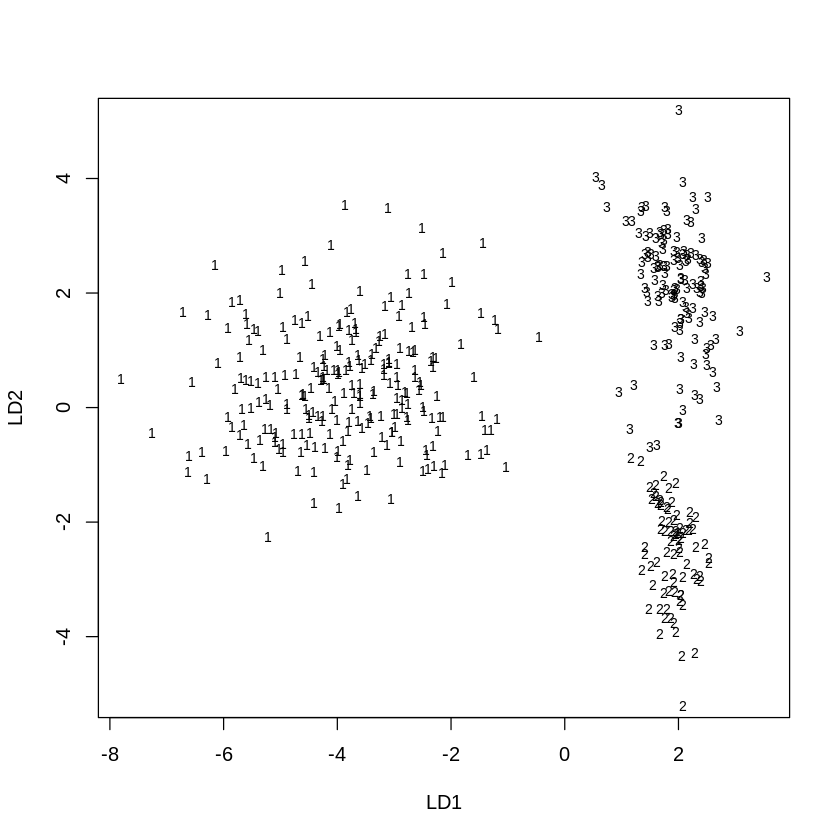

In [12]:
# quite good!
plot(lda)

In [13]:
# training error
train_predict <- predict(lda, train[,3:10])

(t <- table(train$Region, train_predict$class))

missclassified(t)

   
      1   2   3
  1 249   0   1
  2   0  80   0
  3   0   3 127

[1] 0.009

In [14]:
# testing error
test_predict <- predict(lda, test[,3:10])

(t <- table(test$Region, test_predict$class))

missclassified(t)

   
     1  2  3
  1 73  0  0
  2  0 18  0
  3  0  0 24

[1] 0

## QDA

In [15]:
# features: all except Region,Area
qda <- qda(train$Region ~ ., data=train[,3:10])

qda

Call:
qda(train$Region ~ ., data = train[, 3:10])

Prior probabilities of groups:
        1         2         3 
0.5434783 0.1739130 0.2826087 

Group means:
  Palmitic Palmitoleic  Stearic    Oleic  Linoleic Linolenic Arachidic
1 1335.904   156.39600 227.2280 7098.888 1033.7800  37.62400  62.80000
2 1110.975    96.11250 225.3500 7272.788 1192.8125  26.92500  72.77500
3 1094.638    83.93846 232.7154 7784.831  730.8231  21.26923  37.35385
  Eicosenoic
1     27.016
2      1.950
3      2.000

In [16]:
# training error
train_predict <- predict(qda, train[,3:10])

(t <- table(train$Region, train_predict$class))

missclassified(t)

   
      1   2   3
  1 250   0   0
  2   0  80   0
  3   0   0 130

[1] 0

In [17]:
# training error
test_predict <- predict(qda, test[,3:10])

(t <- table(test$Region, test_predict$class))

missclassified(t)

   
     1  2  3
  1 73  0  0
  2  0 18  0
  3  0  0 24

[1] 0

## Logistic Regression

Usually, logistic regression takes a 0/1 (binary) outcome. Multinomial logistic regression allows us to model an outcome with more than 2 labels.

See here for details: http://www.ats.ucla.edu/stat/r/dae/mlogit.htm

In [18]:
library(nnet)

In [19]:
region2_train <- relevel(as.factor(train$Region), ref="3")
region2_test  <- relevel(as.factor(test$Region), ref="3")

In [20]:
mn <- multinom(region2_train ~ ., train[,c(3:10)])

mn %>% summary

# weights:  30 (18 variable)
initial  value 505.361653 
iter  10 value 87.860909
iter  20 value 18.495590
iter  30 value 0.632396
iter  40 value 0.006528
final  value 0.000094 
converged


Call:
multinom(formula = region2_train ~ ., data = train[, c(3:10)])

Coefficients:
  (Intercept)    Palmitic Palmitoleic     Stearic       Oleic   Linoleic
1  -0.1651733  0.04405125  0.03097078 -0.02486397 -0.01746693 0.05556203
2   2.4087680 -0.04532019 -0.11037304 -0.05615716 -0.01035501 0.12828971
   Linolenic Arachidic Eicosenoic
1 -0.5829411 0.4611474  2.6416797
2 -0.3408100 0.5046266  0.2655393

Std. Errors:
  (Intercept)  Palmitic Palmitoleic   Stearic     Oleic Linoleic Linolenic
1  0.04881238  2.668981    6.785148  6.818919 0.8818789 3.003840  46.63454
2  0.08478626 11.531378   42.936379 12.243464 0.9957951 3.360213 108.46448
  Arachidic Eicosenoic
1  26.99560   95.78603
2  40.35032   47.72963

Residual Deviance: 0.0001874657 
AIC: 36.00019 

In [21]:
## error-training (see below for alternative)
(t  <- table(region2_train, predict(mn)))

missclassified(t)

             
region2_train   3   1   2
            3 130   0   0
            1   0 250   0
            2   0   0  80

[1] 0

In [22]:
## error-testing
(t  <- table(region2_test, predict(mn, test[,c(3:10)])))

missclassified(t)

            
region2_test  3  1  2
           3 24  0  0
           1  0 73  0
           2  0  0 18

[1] 0

## KNN

In [25]:
library(class)

In [26]:
t <- err_cv <- err_train  <- err_test <- 0

In [29]:
# number of K's for KNN
kk <- 50

In [30]:
# cross-validation error
for(i in 1:kk){
  knns <- knn.cv(olives[,-c(1,2)], cl=olives$Region, k=i, prob=TRUE)
  t <- table(olives$Region, knns)
  err_cv[i] <- missclassified(t)
}

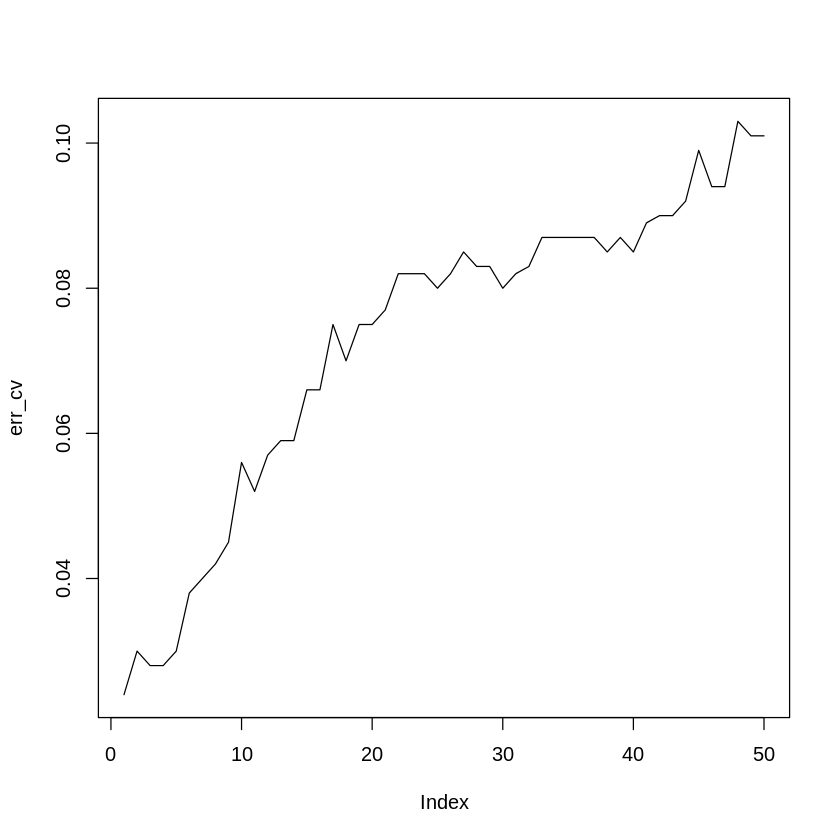

In [31]:
# plot training errors
plot(err_cv,type='l')  

In [ ]:
## test
for(i in 1:kk){
  knns <- knn(olives[,-c(1,2)], test[,-c(1,2)],
              cl=olives$Region, k=i,prob=TRUE)
  t <- table(test$Region,knns)
  err_test[i] <- missclassified(t)
}

In [ ]:
## train
## training error should be =0 when K=1
for(i in 1:kk){
  knns <- knn(olives[,-c(1,2)], olives[,-c(1,2)],
              cl=olives$Region, k=i, prob=TRUE)
  t <- table(olives$Region,knns)
  err_train[i] <- missclassified(t)
}

In [ ]:
## plot ALL errors
err_all <- as.data.frame(c(err_cv, err_test, err_train))
err_all$index <- as.factor(rep(c(1:kk),3))
err_all$error <- as.factor(c(rep("cv",length(err_cv)),
                             rep("test",length(err_test)),
                             rep("train",length(err_train))))

names(err_all) <- c("val","index","error")
#err_all[c(1:10,90:120,190:205,299,300),]

In [ ]:
qplot(index,val,data=err_all,geom="line", group=error, colour=error)+
  scale_x_discrete(breaks=seq(0,50,5))+labs(x="K",y="error value")

In [ ]:
# with ggplot
ggplot(data=err_all, aes(x=index,y=val)) +
    geom_point(size=2,aes(shape=error)) +
    geom_line(aes(group=error)) + 
    scale_x_discrete(breaks=seq(0,50,5)) +
    labs(x="K",y="error value")

## SVM

In [ ]:
# other choices: library(kernlab) which is the SVM in caret [svmLinear()]
library(e1071)

In [ ]:
# important to specify type of outcome for classification or regression
svm <- svm(factor(train$Area) ~ ., data=train[,3:10], type="C", kernel="radial")

svm %>% summary

In [ ]:
# training error
train_predict  <- predict(svm, train[, 3:10], decision.values = TRUE)

# round predicted values to convert them to original class labels
(t <- table(train$Area, train_predict))

missclassified(t)

In [ ]:
# testing error
test_predict <- predict(svm, test[,3:10], decision.values = TRUE)

(t <- table(test$Area, test_predict))

missclassified(t)

### Details
For multiclass-classification with k levels, k>2, libsvm uses the ‘one-against-one’-approach

## Random forests (and trees)

In [ ]:
library(rpart)          # trees
library(randomForest)

In [ ]:
tree <- rpart(factor(train$Area) ~ ., data=train[,3:10])

In [ ]:
#tree %>% summary

In [ ]:
printcp(tree)

In [ ]:
plot(tree)
text(tree, cex = 0.7) # cex = text size
title("Area classification tree. cp=0.01")

In [ ]:
# training error
train_predict <- predict(tree, train[,3:10], type="class")

(t <- table(train$Area, train_predict))

missclassified(t)

In [ ]:
# testing error
test_predict <- predict(tree, test[,3:10], type="class")

(t <- table(test$Area, test_predict))

missclassified(t)

In [ ]:
set.seed(9991)
# using olives dataset, with subset=split
rf <- randomForest(factor(olives$Area) ~., data=olives, subset = split,
                   ntree=1000,mtry=3,
                   importance=TRUE)

In [ ]:
# includes confusion matrix
rf

In [ ]:
# also appears in the above output
missclassified(rf$confusion[,-10])

In [ ]:
# all 8 features were used
varUsed(rf, count = FALSE)

In [ ]:
rf$importance

## Exercises

Perform each of these for the "Area" variable in the olives dataset.

*Copyright &copy; 2016 The Data Incubator.  All rights reserved.*